In [35]:
%pip install numpy pandas scikit-learn 
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
df = pd.read_csv('Data\TOI final.csv')
df

,loc_rowid,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,...,4.19,0.07,-0.07,0,2.169860,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,...,4.03,0.09,-0.09,0,2.010000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,...,NaN,NaN,NaN,0,5.730000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,...,4.14,0.07,-0.07,0,2.150000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,7699,995.01,317951248,FP,07h23m14.75s,110.811443,+05d33m46.26s,5.562850,2.061,0.405,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7699,7700,996.01,142918609,FP,07h57m23.99s,119.349948,-19d30m57.65s,-19.516015,-3.900,0.848,...,NaN,NaN,NaN,0,2.050000,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7700,7701,997.01,341729521,FP,08h05m16.69s,121.319521,-59d34m47.27s,-59.579798,-44.770,0.044,...,4.52,0.08,-0.08,0,0.926261,0.045789,-0.045789,0,2019-07-24 15:58:33,2024-09-09 10:08:01
7701,7702,998.01,54390047,FP,07h53m16.69s,118.319555,-14d13m07.76s,-14.218823,-1.706,0.069,...,4.01,0.07,-0.07,0,2.349860,0.091578,-0.091578,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        7703 non-null   int64  
 1   toi              7703 non-null   float64
 2   tid              7703 non-null   int64  
 3   tfopwg_disp      7703 non-null   object 
 4   rastr            7703 non-null   object 
 5   ra               7703 non-null   float64
 6   decstr           7703 non-null   object 
 7   dec              7703 non-null   float64
 8   st_pmra          7569 non-null   float64
 9   st_pmraerr1      7569 non-null   float64
 10  st_pmraerr2      7569 non-null   float64
 11  st_pmralim       7569 non-null   float64
 12  st_pmdec         7569 non-null   float64
 13  st_pmdecerr1     7569 non-null   float64
 14  st_pmdecerr2     7569 non-null   float64
 15  st_pmdeclim      7569 non-null   float64
 16  pl_tranmid       7703 non-null   float64
 17  pl_tranmiderr1

In [38]:
target_map = {
    "APC": "CANDIDATE",
    "FA": "FALSE POSITIVE",
    "FP": "FALSE POSITIVE",
    "KP": "CONFIRMED",
    "PC": "CANDIDATE",
    "CP": "CONFIRMED"
}
df["tfopwg_disp"] = df["tfopwg_disp"].map(target_map)

In [39]:
df_filled = df.copy()
missing_percent = df_filled.isnull().mean() * 100

# Columns to fill and drop
cols_to_fill = missing_percent[missing_percent < 50].index
cols_to_drop = missing_percent[missing_percent >= 50].index

# Fill numeric columns with median, categorical with mode
for col in cols_to_fill:
    if df_filled[col].dtype in ['float64', 'int64']:
        df_filled[col].fillna(df_filled[col].median(), inplace=True)
    else:
        df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)

# Drop columns with >=50% missing
df_filled.drop(columns=cols_to_drop, inplace=True)

C:\Users\Victus\AppData\Local\Temp\ipykernel_35844\4133624849.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].median(), inplace=True)
C:\Users\Victus\AppData\Local\Temp\ipykernel_35844\4133624849.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [40]:
df_filled.info() # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        7703 non-null   int64  
 1   toi              7703 non-null   float64
 2   tid              7703 non-null   int64  
 3   tfopwg_disp      7703 non-null   object 
 4   rastr            7703 non-null   object 
 5   ra               7703 non-null   float64
 6   decstr           7703 non-null   object 
 7   dec              7703 non-null   float64
 8   st_pmra          7703 non-null   float64
 9   st_pmraerr1      7703 non-null   float64
 10  st_pmraerr2      7703 non-null   float64
 11  st_pmralim       7703 non-null   float64
 12  st_pmdec         7703 non-null   float64
 13  st_pmdecerr1     7703 non-null   float64
 14  st_pmdecerr2     7703 non-null   float64
 15  st_pmdeclim      7703 non-null   float64
 16  pl_tranmid       7703 non-null   float64
 17  pl_tranmiderr1

In [41]:
# Scale all numerical features in df_filtered using StandardScaler

df_scaled = df_filled.copy() # type: ignore
num_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

In [42]:
# Show number of unique values in each categorical feature of df_scaled
cat_cols = df_scaled.select_dtypes(include=['object', 'category', 'bool']).columns
unique_counts = df_scaled[cat_cols].nunique()
print(unique_counts)

tfopwg_disp       3
rastr          7390
decstr         7400
toi_created    1940
rowupdate       893
dtype: int64


In [43]:
df_scaled.drop(columns=['decstr','rastr','rowupdate','toi_created'], inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in df_scaled
cat_cols = df_scaled.select_dtypes(include=['object', 'category', 'bool']).columns

# Apply label encoding to each categorical column
df_scaled_label_encoded = df_scaled.copy()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    # Fill NaN with a placeholder string before encoding
    df_scaled_label_encoded[col] = le.fit_transform(df_scaled_label_encoded[col].fillna('NaN_Label'))
    le_dict[col] = le  # Save encoder if inverse_transform is needed later

df_scaled_label_encoded.head()

,loc_rowid,toi,tid,tfopwg_disp,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,...,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim
0,-1.731826,-1.277301,-1.207012,2,-0.650406,-0.291864,-0.070478,-0.224276,0.224276,0.0,...,-0.119694,0.0,-0.410982,-0.262134,0.262134,0.0,0.503065,0.025507,-0.025507,0.0
1,-1.731376,-1.276836,-0.968907,0,-0.551825,-0.140541,-0.057271,-0.197166,0.197166,0.0,...,0.139715,0.0,-0.968164,-0.195091,0.195091,0.0,0.399599,0.270649,-0.270649,0.0
2,-1.730927,-1.276372,-0.747206,2,-0.723991,-0.247291,-0.011494,-0.031322,0.031322,0.0,...,0.144216,0.0,0.076551,-0.213325,0.213325,0.0,2.807279,-0.151353,0.151353,0.0
3,-1.730477,-1.275907,-0.856753,2,-0.667742,-0.555464,-0.004642,-0.294441,0.294441,0.0,...,-0.686717,0.0,-0.550278,5.000736,-5.000736,0.0,-0.102428,-0.151353,0.151353,0.0
4,-1.730027,-1.275442,-0.042828,2,-0.555704,-1.052613,-0.051245,-0.249790,0.249790,0.0,...,0.055871,0.0,-0.585102,-0.262134,0.262134,0.0,0.490211,-0.151353,0.151353,0.0


In [45]:
df_scaled_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        7703 non-null   float64
 1   toi              7703 non-null   float64
 2   tid              7703 non-null   float64
 3   tfopwg_disp      7703 non-null   int32  
 4   ra               7703 non-null   float64
 5   dec              7703 non-null   float64
 6   st_pmra          7703 non-null   float64
 7   st_pmraerr1      7703 non-null   float64
 8   st_pmraerr2      7703 non-null   float64
 9   st_pmralim       7703 non-null   float64
 10  st_pmdec         7703 non-null   float64
 11  st_pmdecerr1     7703 non-null   float64
 12  st_pmdecerr2     7703 non-null   float64
 13  st_pmdeclim      7703 non-null   float64
 14  pl_tranmid       7703 non-null   float64
 15  pl_tranmiderr1   7703 non-null   float64
 16  pl_tranmiderr2   7703 non-null   float64
 17  pl_tranmidlim 

In [46]:
# Calculate correlations with "TOI_disposition"
corr_with_disposition = df_scaled_label_encoded.corr(numeric_only=True)["tfopwg_disp"].drop("tfopwg_disp")
corr_with_disposition = corr_with_disposition.abs()  # Use absolute values for correlation strength
# Sort correlations in descending order
corr_with_disposition_sorted = corr_with_disposition.sort_values(ascending=False)
print(corr_with_disposition_sorted)

toi                0.352405
st_tmag            0.238270
loc_rowid          0.230721
pl_eqt             0.219080
pl_tranmid         0.182950
pl_insol           0.158500
st_rad             0.083001
st_raderr1         0.067516
st_raderr2         0.067516
pl_radeerr2        0.060801
pl_radeerr1        0.060801
st_tmagerr2        0.057016
st_tmagerr1        0.057016
st_loggerr2        0.055888
st_loggerr1        0.055888
st_teff            0.049384
st_disterr2        0.048997
st_disterr1        0.048997
st_pmdecerr1       0.048763
st_pmdecerr2       0.048763
st_pmraerr2        0.048582
st_pmraerr1        0.048582
pl_orbper          0.045925
dec                0.042892
pl_orbpererr1      0.038532
pl_orbpererr2      0.038532
st_dist            0.034453
pl_rade            0.030467
st_logg            0.029497
st_tefferr2        0.029164
st_tefferr1        0.029164
pl_trandurh        0.027542
st_pmdec           0.024175
pl_trandeperr2     0.020623
pl_trandeperr1     0.020623
st_pmra            0

In [47]:
print(df["tfopwg_disp"].unique())
print(df["tfopwg_disp"].dtype)


['FALSE POSITIVE' 'CANDIDATE' 'CONFIRMED']
object


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = df_scaled_label_encoded.drop(columns="tfopwg_disp")
y = df_scaled_label_encoded["tfopwg_disp"]

# Handle categorical variables if any
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)


toi                0.068530
loc_rowid          0.054858
st_tmag            0.040109
pl_tranmid         0.035751
pl_eqt             0.035251
st_dist            0.031589
pl_insol           0.031234
pl_trandurherr2    0.029427
pl_trandep         0.027090
pl_tranmiderr1     0.026881
pl_tranmiderr2     0.025686
pl_trandurherr1    0.025565
pl_orbper          0.025173
pl_rade            0.025022
st_disterr2        0.024414
pl_trandurh        0.023851
pl_orbpererr1      0.023708
st_disterr1        0.023354
pl_orbpererr2      0.022458
pl_trandeperr1     0.021441
pl_radeerr2        0.021324
pl_radeerr1        0.021213
pl_trandeperr2     0.020300
dec                0.020220
st_rad             0.019941
st_pmdec           0.019790
ra                 0.019126
tid                0.018971
st_pmra            0.018713
st_logg            0.018384
st_teff            0.018364
st_pmraerr2        0.016690
st_pmdecerr1       0.016327
st_pmdecerr2       0.016276
st_pmraerr1        0.016093
st_tefferr1        0

In [49]:
# Select top N features from both correlation and feature importance
N = 20

# Get top N features by absolute correlation with disposition
top_corr_features = corr_with_disposition_sorted.head(N).index.tolist()

# Get top N features by Random Forest importance (excluding one-hot columns for clarity)
top_importance_features = importances_sorted.head(10).index.tolist()

# Combine and deduplicate
selected_features = list(set(top_corr_features + top_importance_features))

# Filter X_train to only these features
valuable_features_df = X[selected_features]

print("Selected features:", selected_features)
valuable_features_df.info()

Selected features: ['st_teff', 'st_raderr1', 'st_tmagerr2', 'pl_tranmiderr1', 'pl_insol', 'st_loggerr1', 'st_dist', 'st_pmdecerr1', 'pl_tranmid', 'pl_radeerr1', 'st_disterr2', 'st_disterr1', 'pl_trandurherr2', 'st_raderr2', 'toi', 'st_tmag', 'loc_rowid', 'st_rad', 'st_tmagerr1', 'st_pmdecerr2', 'pl_eqt', 'st_loggerr2', 'pl_radeerr2', 'pl_trandep']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   st_teff          7703 non-null   float64
 1   st_raderr1       7703 non-null   float64
 2   st_tmagerr2      7703 non-null   float64
 3   pl_tranmiderr1   7703 non-null   float64
 4   pl_insol         7703 non-null   float64
 5   st_loggerr1      7703 non-null   float64
 6   st_dist          7703 non-null   float64
 7   st_pmdecerr1     7703 non-null   float64
 8   pl_tranmid       7703 non-null   float64
 9   pl_radeerr1      7703 non-null  

In [50]:
valuable_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   st_teff          7703 non-null   float64
 1   st_raderr1       7703 non-null   float64
 2   st_tmagerr2      7703 non-null   float64
 3   pl_tranmiderr1   7703 non-null   float64
 4   pl_insol         7703 non-null   float64
 5   st_loggerr1      7703 non-null   float64
 6   st_dist          7703 non-null   float64
 7   st_pmdecerr1     7703 non-null   float64
 8   pl_tranmid       7703 non-null   float64
 9   pl_radeerr1      7703 non-null   float64
 10  st_disterr2      7703 non-null   float64
 11  st_disterr1      7703 non-null   float64
 12  pl_trandurherr2  7703 non-null   float64
 13  st_raderr2       7703 non-null   float64
 14  toi              7703 non-null   float64
 15  st_tmag          7703 non-null   float64
 16  loc_rowid        7703 non-null   float64
 17  st_rad        

In [51]:
# Remove 'tfopwg_disp' from valuable_features_df if present
if 'tfopwg_disp' in valuable_features_df.columns:
    valuable_features_df = valuable_features_df.drop(columns=['tfopwg_disp'])

# Add the target variable (koi_disposition) to valuable_features_df
preprocessed_df = valuable_features_df.copy()

preprocessed_df["tfopwg_disp"] = df_scaled_label_encoded.loc[valuable_features_df.index, "tfopwg_disp"]

preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   st_teff          7703 non-null   float64
 1   st_raderr1       7703 non-null   float64
 2   st_tmagerr2      7703 non-null   float64
 3   pl_tranmiderr1   7703 non-null   float64
 4   pl_insol         7703 non-null   float64
 5   st_loggerr1      7703 non-null   float64
 6   st_dist          7703 non-null   float64
 7   st_pmdecerr1     7703 non-null   float64
 8   pl_tranmid       7703 non-null   float64
 9   pl_radeerr1      7703 non-null   float64
 10  st_disterr2      7703 non-null   float64
 11  st_disterr1      7703 non-null   float64
 12  pl_trandurherr2  7703 non-null   float64
 13  st_raderr2       7703 non-null   float64
 14  toi              7703 non-null   float64
 15  st_tmag          7703 non-null   float64
 16  loc_rowid        7703 non-null   float64
 17  st_rad        

In [52]:
# Calculate percentage of outliers in each numerical column using IQR bounds

Q1 = preprocessed_df.quantile(0.25)
Q3 = preprocessed_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_percent = ((preprocessed_df < lower_bound) | (preprocessed_df > upper_bound)).sum() / len(df) * 100
outlier_percent = outlier_percent.sort_values(ascending=False)
print(outlier_percent)

st_raderr1         19.836427
st_raderr2         19.836427
st_loggerr1        19.498897
st_loggerr2        19.498897
st_tmagerr1        16.305336
st_tmagerr2        16.305336
pl_radeerr2        13.631053
pl_radeerr1        13.631053
st_pmdecerr1       11.969363
st_pmdecerr2       11.969363
pl_insol           11.735687
st_teff             9.749448
st_disterr2         8.594054
st_disterr1         8.594054
pl_trandep          5.335584
pl_trandurherr2     5.322602
pl_tranmiderr1      5.088926
st_rad              4.284045
pl_eqt              3.699857
st_dist             2.661301
st_tmag             0.415423
pl_tranmid          0.012982
loc_rowid           0.000000
toi                 0.000000
tfopwg_disp         0.000000
dtype: float64


In [53]:
# Show class balance for the target variable in the full dataset
print("Class distribution in full dataset:")
print(y.value_counts())

# Show class balance for the training set
print("\nClass distribution in training set:")
print(y_train.value_counts())

# Show class balance for the test set
print("\nClass distribution in test set:")
print(y_test.value_counts())

Class distribution in full dataset:
tfopwg_disp
0    5141
2    1295
1    1267
Name: count, dtype: int64

Class distribution in training set:
tfopwg_disp
0    3888
1     945
2     944
Name: count, dtype: int64

Class distribution in test set:
tfopwg_disp
0    1253
2     351
1     322
Name: count, dtype: int64


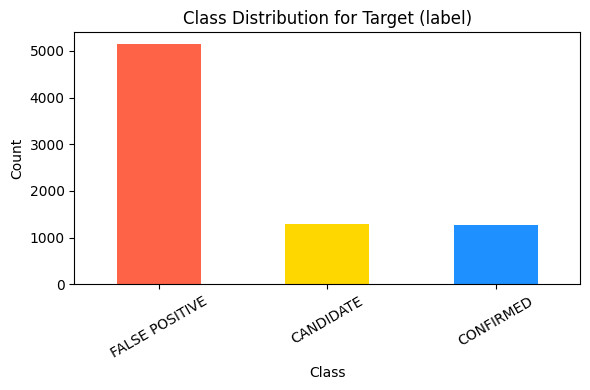

In [54]:
import matplotlib.pyplot as plt

# Visualize class distribution for the target column "label"
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', color=['tomato', 'gold', 'dodgerblue'])
plt.xticks(ticks=[0,1,2], labels=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"], rotation=30)
plt.title("Class Distribution for Target (label)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [55]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert to tensors if not already
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Data loaders
batch_size = 16  # Adjust based on your data size and memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Compute class weights for imbalance (optional but recommended for recall)
class_counts = np.bincount(y_train.numpy())
class_weights = 1. / class_counts
class_weights = torch.tensor(class_weights / class_weights.sum(), dtype=torch.float32)  # Normalize

X_train.shape

torch.Size([5777, 55])

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout_rate=0.3):  # <-- fixed __init__
        super(ResidualBlock, self).__init__()  # <-- fixed __init__
        self.fc = nn.Linear(in_features, out_features)
        self.ln = nn.LayerNorm(out_features)  # Layer norm for better stability
        self.dropout = nn.Dropout(dropout_rate)
        
        # Projection if dimensions differ
        self.proj = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()
    
    def forward(self, x):
        residual = self.proj(x)
        x = F.silu(self.ln(self.fc(x)))  # Swish activation
        x = self.dropout(x)
        return x + residual  # Skip connection


class ResidualMLP(nn.Module):
    def __init__(self, input_size=16, num_classes=3):  # <-- fixed __init__
        super(ResidualMLP, self).__init__()  # <-- fixed __init__
        self.entry = nn.Linear(input_size, 256)  # Entry layer
        
        # Residual blocks for depth
        self.res_block1 = ResidualBlock(256, 256)
        self.res_block2 = ResidualBlock(256, 128)
        self.res_block3 = ResidualBlock(128, 128)
        self.res_block4 = ResidualBlock(128, 64)
        
        self.dropout_final = nn.Dropout(0.2)
        self.fc_out = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = F.silu(self.entry(x))
        
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        
        x = self.dropout_final(x)
        x = self.fc_out(x)  # Logits output
        return x


In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Ensure y_train is numpy
if isinstance(y_train, torch.Tensor):
    y_train_np = y_train.cpu().numpy()
else:
    y_train_np = np.array(y_train)

# Get unique classes
classes = np.unique(y_train_np)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_np
)

# Convert to tensor for PyTorch
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

print("Classes:", classes)
print("Class Weights:", class_weights)


# ---- Focal Loss with class weights ----
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha  # can be class weights tensor
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)  # probability of true class
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss


# ---- Initialize with class weights ----
loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)


Classes: [0 1 2]
Class Weights: tensor([0.4953, 2.0377, 2.0399], device='cuda:0')


In [58]:
print("CUDA Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current Device Index:", torch.cuda.current_device())

CUDA Available: True
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU
Number of GPUs: 1
Current Device Index: 0


In [59]:
import torch
import torch.nn as nn
import numpy as np

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
input_size = X_train.shape[1]  # number of features
model = ResidualMLP(input_size=input_size, num_classes=3).to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler (ReduceLROnPlateau equivalent)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.8, patience=6, min_lr=1e-6
)

# Early stopping setup
patience = 20
best_accuracy = 0.0
epochs_no_improve = 0
best_model_path = "TESS_best_residual_mlp_model.pth"

# Training loop
epochs = 300
for epoch in range(epochs):
    # --- Training ---
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    # --- Evaluation on test set ---
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = loss_fn(outputs, batch_y)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    # --- Scheduler step ---
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(test_accuracy)
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr < old_lr:
        print(f"📉 Learning rate reduced from {old_lr:.6f} to {new_lr:.6f}")

    # --- Save best model ---
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Saved new best model at epoch {epoch+1} with Test Accuracy: {best_accuracy:.2f}%")
        epochs_no_improve = 0  # reset patience counter
    else:
        epochs_no_improve += 1

    # --- Logging ---
    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
        f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%"
    )


print(f"\n🎯 Training finished. Best Test Accuracy: {best_accuracy:.2f}%")


✅ Saved new best model at epoch 1 with Test Accuracy: 40.97%
Epoch 1/300 | Train Loss: 0.4923, Train Acc: 38.71% | Test Loss: 0.4581, Test Acc: 40.97%
Epoch 2/300 | Train Loss: 0.3975, Train Acc: 41.32% | Test Loss: 0.4012, Test Acc: 39.20%
Epoch 3/300 | Train Loss: 0.3578, Train Acc: 41.67% | Test Loss: 0.3893, Test Acc: 37.85%
✅ Saved new best model at epoch 4 with Test Accuracy: 45.95%
Epoch 4/300 | Train Loss: 0.3494, Train Acc: 42.05% | Test Loss: 0.3878, Test Acc: 45.95%
Epoch 5/300 | Train Loss: 0.3349, Train Acc: 42.22% | Test Loss: 0.3872, Test Acc: 42.94%
Epoch 6/300 | Train Loss: 0.3260, Train Acc: 43.73% | Test Loss: 0.3729, Test Acc: 42.99%
✅ Saved new best model at epoch 7 with Test Accuracy: 50.26%
Epoch 7/300 | Train Loss: 0.3198, Train Acc: 43.10% | Test Loss: 0.3677, Test Acc: 50.26%
Epoch 8/300 | Train Loss: 0.3088, Train Acc: 43.17% | Test Loss: 0.3841, Test Acc: 46.78%
✅ Saved new best model at epoch 9 with Test Accuracy: 52.13%
Epoch 9/300 | Train Loss: 0.3079, Tr

In [ ]:
from sklearn.metrics import classification_report

# --- Evaluate on test set and generate classification report ---
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Generate report
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds, digits=4))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reverse map: from int → label
label_map = {"FALSE POSITIVE": 0, "CANDIDATE": 1, "CONFIRMED": 2}
inv_label_map = {v: k for k, v in label_map.items()}

# Put model in eval mode and collect predictions
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Create readable labels
labels = [inv_label_map[i] for i in sorted(inv_label_map.keys())]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
